# Proyecto 13

**Descripción del proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. Vamos a calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.


# Descripción de los datos

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. 

-'Churn' — la cancelación para el mes en cuestión.

**Campos de dataset actuales:**

Datos del usuario del mes anterior

'gender'

'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.

'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).

Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).

'Phone' — si el/la usuario/a aportó el número de teléfono.

'Age'.

'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

**Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:**

'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.

'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.

'Group_visits' — si el/la usuario/a participa en sesiones grupales.

'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.

'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.

'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

**Ruta de archivo: /datasets/gym_churn_us.csv**

# Descarga de los datos

Se descargará el data y se visulaiará de forma rápida la información que se nos a proporcionado, para iniciar con su analisis posteriormente.

In [1]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#cargar los archivos
data= pd.read_csv("/datasets/gym_churn_us.csv")

In [3]:
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
#buscar filas duplicadas
print(data.duplicated().sum())

0


No se encontraron tipos de datos incorrectos dentro del data, no se visualizan filas duplicadas.
El data esta listo para su exploración.

Si se desea se podría modificar los títulos de las columnas para facilidad de uso, pero en mi caso lo dejaré así, sin modificar minúsculas u otros cambios posibles.

# Análisis exploratorio de datos (EDA)

Explicacion de que buscamos hacer en esta parte del proyecto.

In [6]:
#buscar valores ausentes
print(data.isna().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [7]:
#Estudia los valores promedio y la desviación estándar de cada columna de todo el data.
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
#Filtran a un nuevo data con los usuarios que ya estan canceladas sus subscripciones
cancelados=data[data["Churn"]== 1]
cancelados

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


In [9]:
#Observa los valores medios de las usuarios cancelados
cancelados.mean()

gender                                 0.510839
Near_Location                          0.768143
Partner                                0.355325
Promo_friends                          0.183789
Phone                                  0.902922
Contract_period                        1.728558
Group_visits                           0.268615
Age                                   26.989632
Avg_additional_charges_total         115.082899
Month_to_end_contract                  1.662582
Lifetime                               0.990575
Avg_class_frequency_total              1.474995
Avg_class_frequency_current_month      1.044546
Churn                                  1.000000
dtype: float64

In [10]:
#Filtran a un nuevo data con solo los usuarios que siguen activos
activos=data[data["Churn"]== 0]
activos

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [11]:
#Observa los valores medios de las usuarios activos
activos.mean()

gender                                 0.510037
Near_Location                          0.873086
Partner                                0.534195
Promo_friends                          0.353522
Phone                                  0.903709
Contract_period                        5.747193
Group_visits                           0.464103
Age                                   29.976523
Avg_additional_charges_total         158.445715
Month_to_end_contract                  5.283089
Lifetime                               4.711807
Avg_class_frequency_total              2.024876
Avg_class_frequency_current_month      2.027882
Churn                                  0.000000
dtype: float64

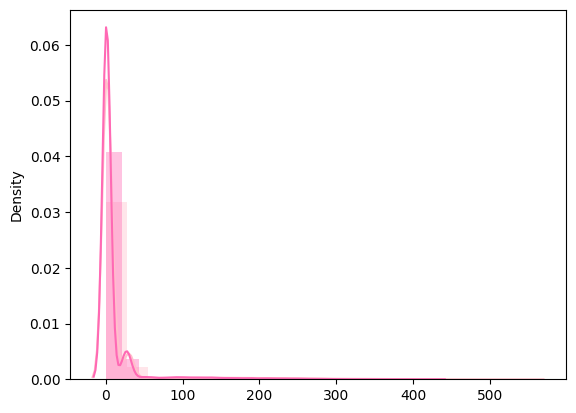

In [12]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

sns.distplot(activos, bins = 20, color="pink") #histograma para usuarios activos
sns.distplot(cancelados, bins = 20, color="hotpink") #histograma para usuarios inactivos
plt.show()

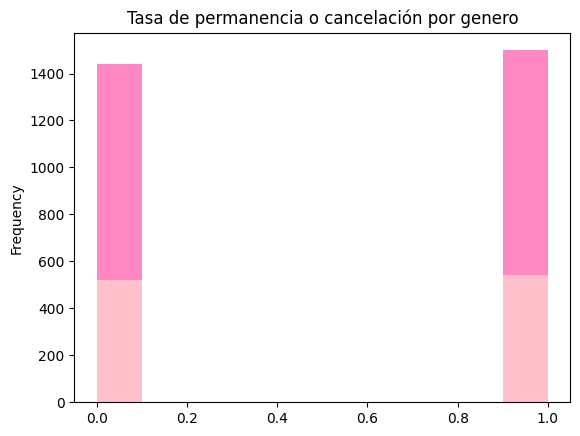

In [13]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
#se filtra por grupo de cancelado o activo según el genero
data[data["Churn"]== 0]["gender"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["gender"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Tasa de permanencia o cancelación por genero")
plt.show()

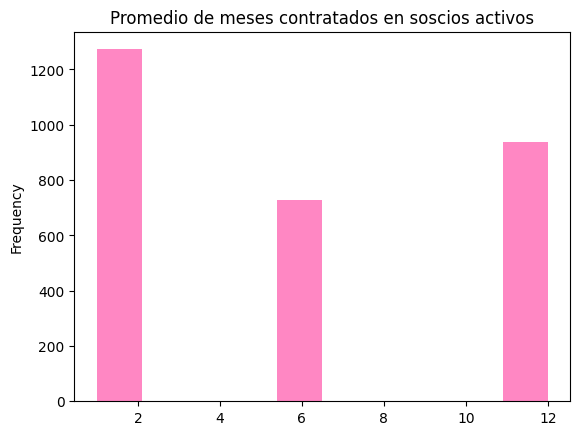

In [14]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
#se filtra para analizar grupo activo y periodo de contratacion
data[data["Churn"]== 0]["Contract_period"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")

#añade informacion al gráfico para mejor visualización
plt.title("Promedio de meses contratados en soscios activos")
plt.show()

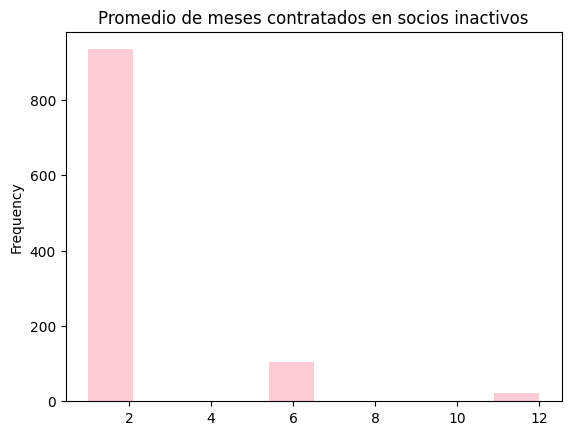

In [15]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
#se filtra para analizar grupo activo y periodo de contratacion
data[data["Churn"]== 1]["Contract_period"].plot(kind= "hist", bins=10, alpha=0.8, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Promedio de meses contratados en socios inactivos")
plt.show()

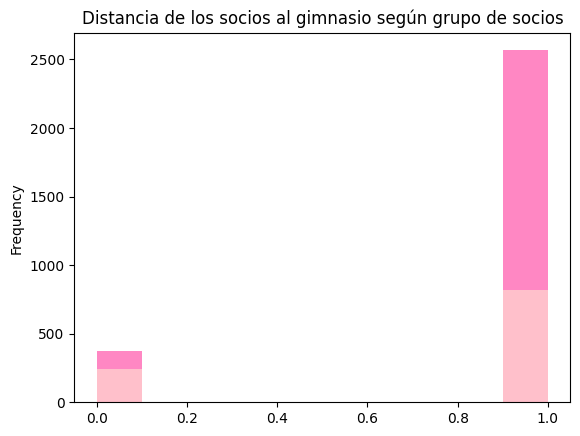

In [16]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Near_Location"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Near_Location"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Distancia de los socios al gimnasio según grupo de socios")
plt.show()

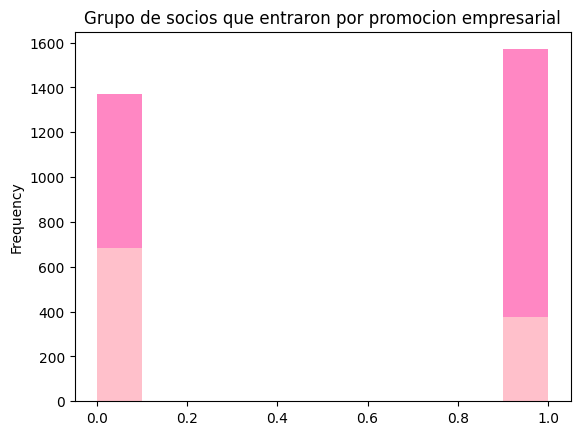

In [17]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Partner"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Partner"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Grupo de socios que entraron por promocion empresarial")
plt.show()

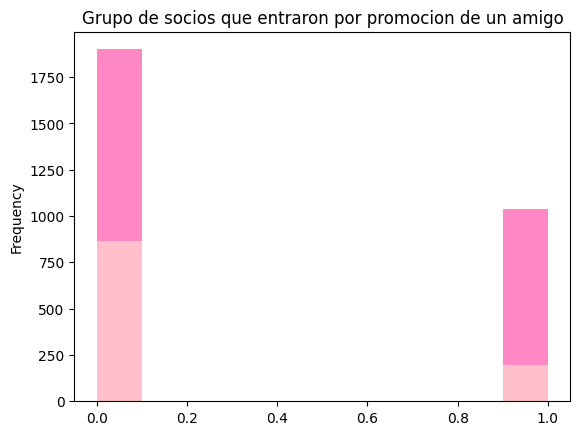

In [18]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Promo_friends"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Promo_friends"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Grupo de socios que entraron por promocion de un amigo")
plt.show()

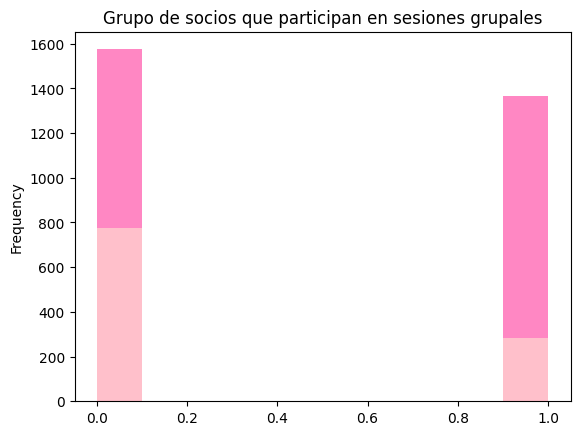

In [19]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Group_visits"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Group_visits"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Grupo de socios que participan en sesiones grupales")
plt.show()

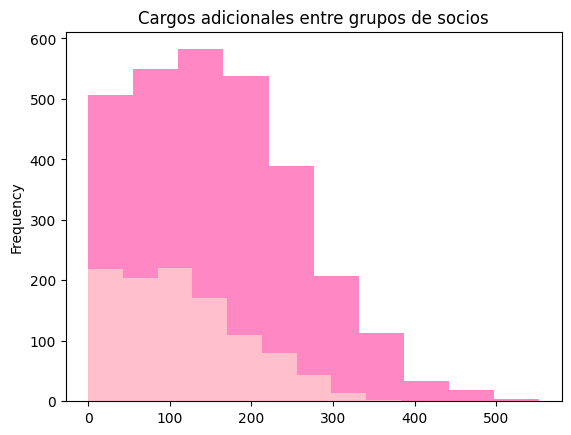

In [20]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Avg_additional_charges_total"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Avg_additional_charges_total"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Cargos adicionales entre grupos de socios")
plt.show()

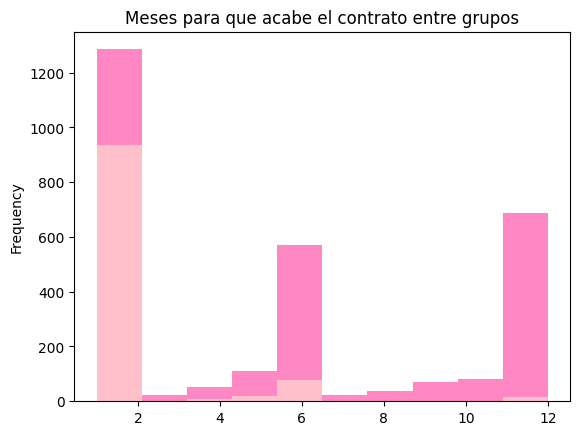

In [21]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Month_to_end_contract"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Month_to_end_contract"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Meses para que acabe el contrato entre grupos")
plt.show()

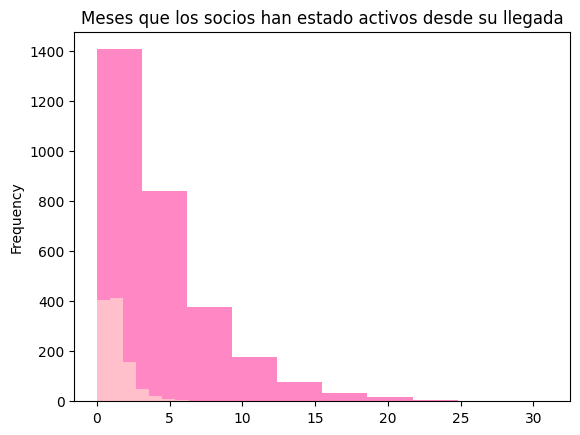

In [22]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Lifetime"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Lifetime"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Meses que los socios han estado activos desde su llegada")
plt.show()

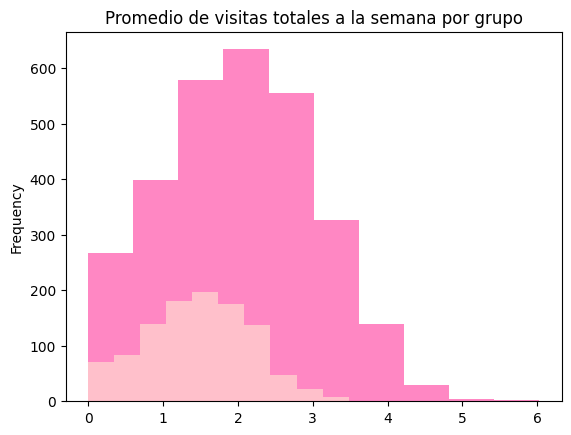

In [23]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
data[data["Churn"]== 0]["Avg_class_frequency_total"].plot(kind= "hist", bins=10, alpha=0.8, color= "hotpink")
data[data["Churn"]== 1]["Avg_class_frequency_total"].plot(kind= "hist", bins=10, color= "pink")

#añade informacion al gráfico para mejor visualización
plt.title("Promedio de visitas totales a la semana por grupo")
plt.show()

**Se analizaron todas las caracteristicas posibles para observar el comportamento de los usuarios
Algunos de los histogramas decidí hacerlos en el mismo grafuco con la finalidad de visualmente tenr una mejor comparativa  hacer una análisis de la situación más rápida visulamente.**

In [24]:
#Crea una matriz de correlación
correlacion_data = data.corr()
correlacion_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Se ha encontrado una gran relación entre las siguientes características:

-Meses para que acabe el contrato y el tiempo de paquete.

-Frecuencia de clases a la semana  el tiempo de contrato.

-Frecuencia semanal y frecuencia mensual de los usurios.

#  Modelo para predecir la cancelación de usuarios

Ahora crearemos un modelo de clasificación binaria para los clientes, donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente. Usaremos 2 métodos para comparar su efectividad y así lograr un mejor toma de decisiones posteriormente.


In [25]:
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [26]:
#Divide los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# define la función que podrá generar nuestras métricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [28]:
#Entrena el modelo con el regresión logística.
lr_model = LogisticRegression(random_state=0) # entrena el modelo 
lr_model.fit(X_train, y_train)

# utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# muestra todas las métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

Métricas de regresión logística:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.81


In [30]:
#Entrena el modelo con el método bosque aleatorio.
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# entrena el modelo de random forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
# utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]


In [32]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de random forest:')

Métricas de random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


**¿Qué modelo dio mejores resultados?**

Los resultados de ambos modelos son muy similares:
Métricas de regresión logística:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.81
   
Métricas de random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
    
Conociendo el signifcado de cada valor, la exactitud se esta prediciendo en la misma proporción (00.92 = 92%, lo que es casi el 100%) lo que nos da una buena idea de que tenemos datos certeros.

Ahora, basandonos en los siguientes resultados podemos determinar que es ligeramente superior la métrica de forets, por el valor de recall, a que tuvimos por 0.01 una mejor en esta métrica, lo que nos asegura que los riesgos se pueden minimiar de forma mínima usando esta métrica.

Aunque siendo muy ojetivos, los valores son casi identicos, por lo que el uso de cualquiera de estos métodos podría ser un método acertado para nuestro trabajo en esta ocasión.


# Crear clústeres de los usuarios

Ahora dejemos de lado la columna con datos sobre la cancelación e identifica los clústeres de los usuarios. 

Ahora usaremos el aprendizaje no supervisado para encontrar una similitud entre los usuarios. Una vez que el modelo haya detectado similitudes entre los usuarios, los agruparemos,encontrando similitudes entre las usuarios  buscar su lealtad a nuestra empresa, según sus acciones registradas.


In [33]:
#Estandariza los datos.
sc = StandardScaler()
x_sc = sc.fit_transform(data)

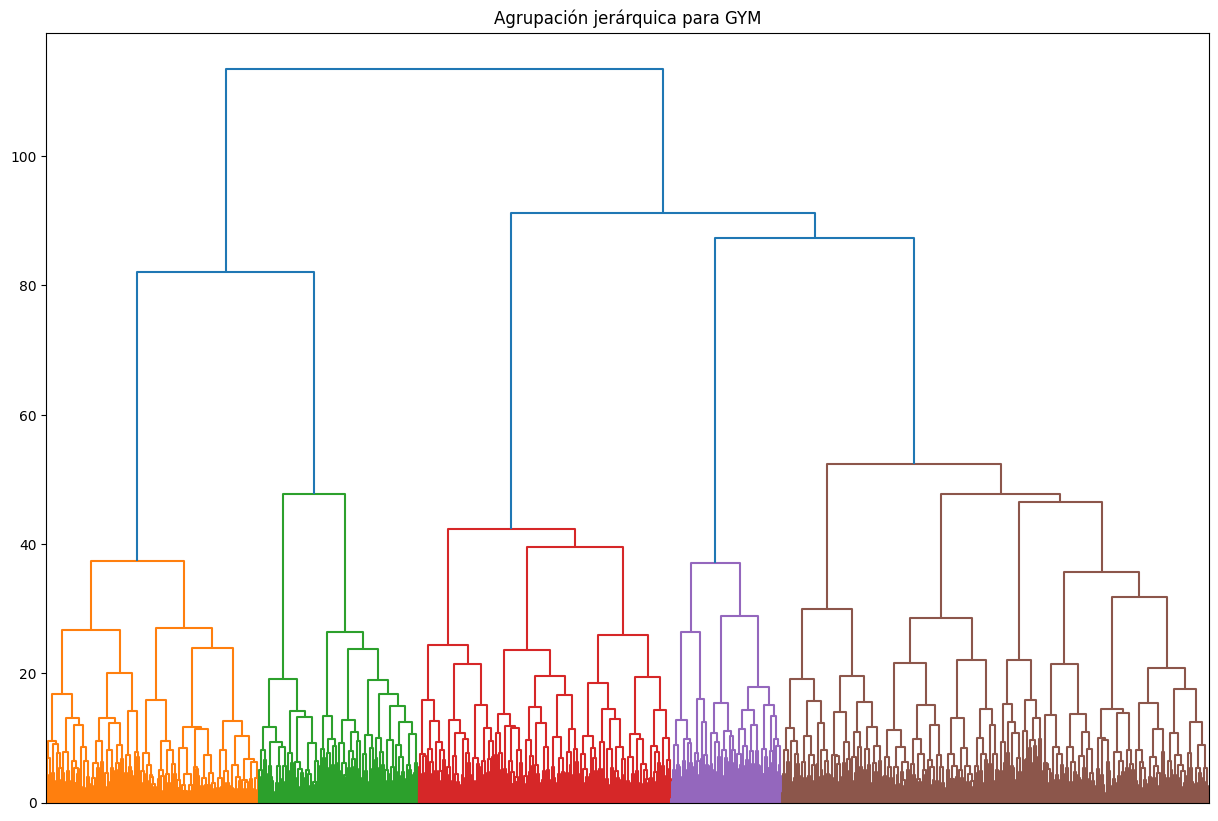

In [34]:
#Crear una matriz de distancias basada en la matriz de características estandarizada sin sticks en eje X
linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10)) #trazar un dendrograma. 
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.xticks([]) #eliminar sticks en eje X para mejor visualiacipn del gráfico
plt.show()

In [35]:
#Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. 

km = KMeans(n_clusters=5) # define el modelo k_means con 5 clústeres

labels = km.fit_predict(x_sc) # predice los clústeres para las observaciones

data['cluster_km'] = labels # almacena etiquetas de clúster en el campo de nuestro conjunto de datos

In [36]:
#Mira los valores medios de característica para los clústeres.
data.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,0.470656,0.829689,0.454545,0.263521,1.000000,2.662831,0.386651,30.016110,153.882298,2.479862,4.668585,1.182943,1.181898,0.001151
2,0.553318,0.838863,0.368483,0.209716,0.998815,2.728673,0.436019,29.982227,158.892470,2.515403,4.595972,2.928069,2.935050,0.007109
3,0.505187,0.938797,0.767635,0.561203,1.000000,11.197095,0.559129,29.896266,162.376877,10.237552,4.703320,2.017145,2.011502,0.015560
4,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875


**¿Hay algo que te llame la atención?**

En general solo con esta tabla es dificil encontra datos, sobre todo por la cantidad de caracteristicas que tenemos a analizar, peo si vemos la columna de abandono el grupo 3 es el que más altos niveles nos da, lo que podría empezar a darnos una idea sobre en qu egrupo podemos encontrar mayor abandono.

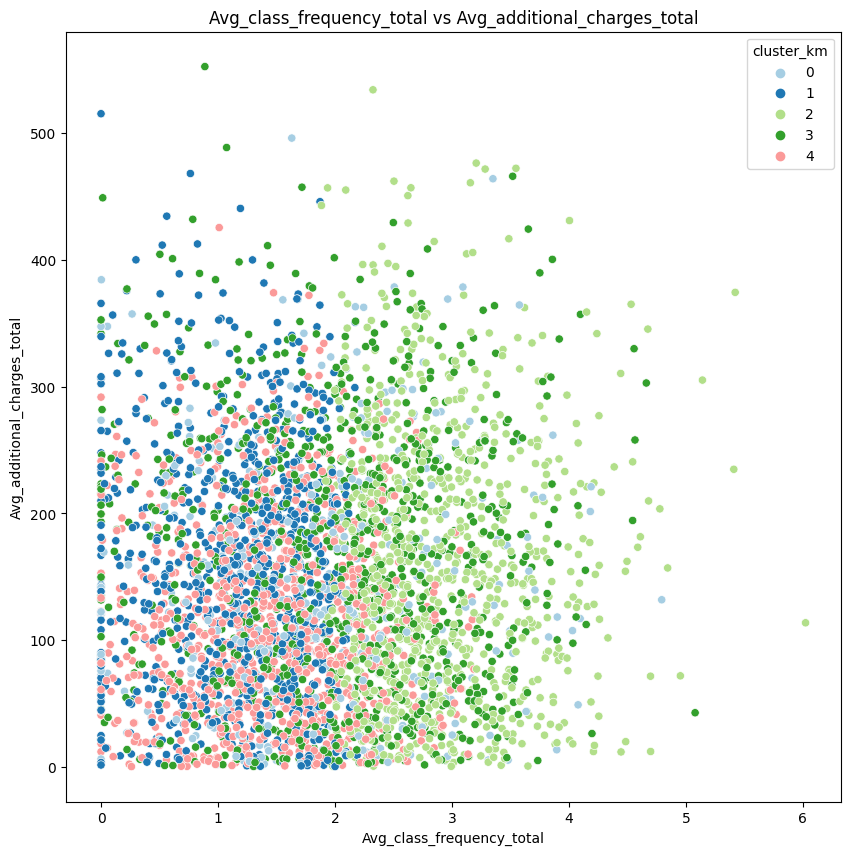

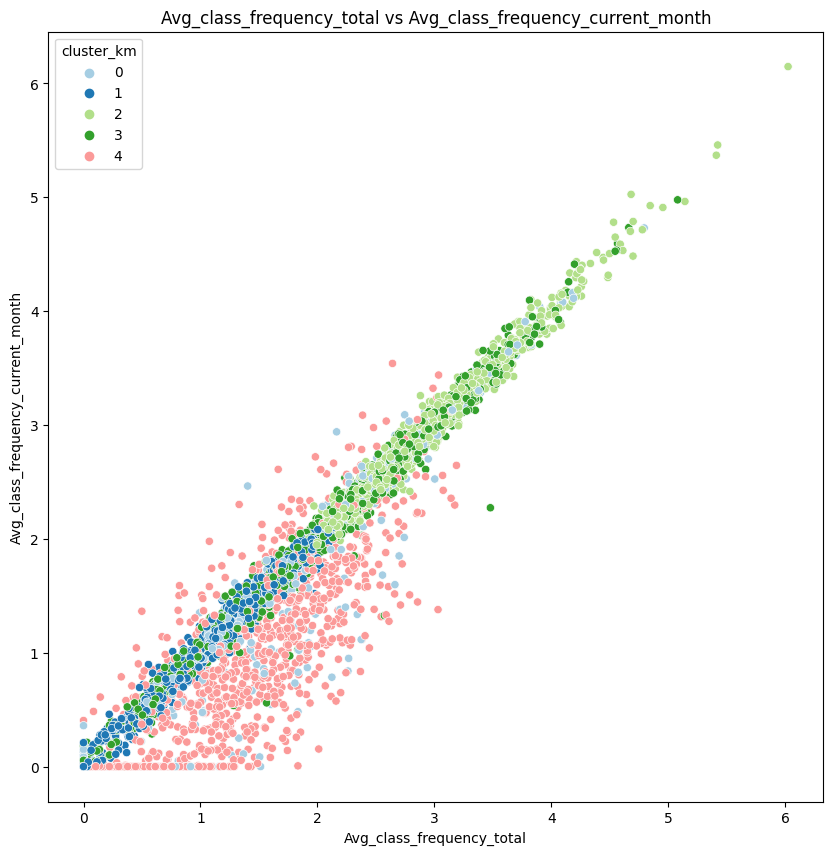

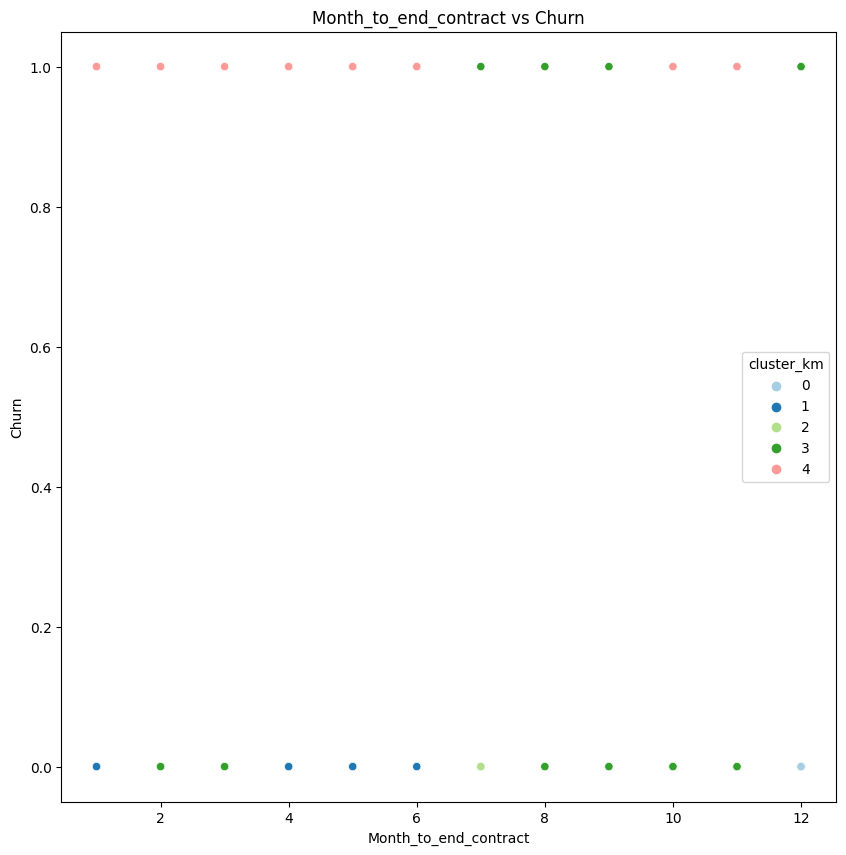

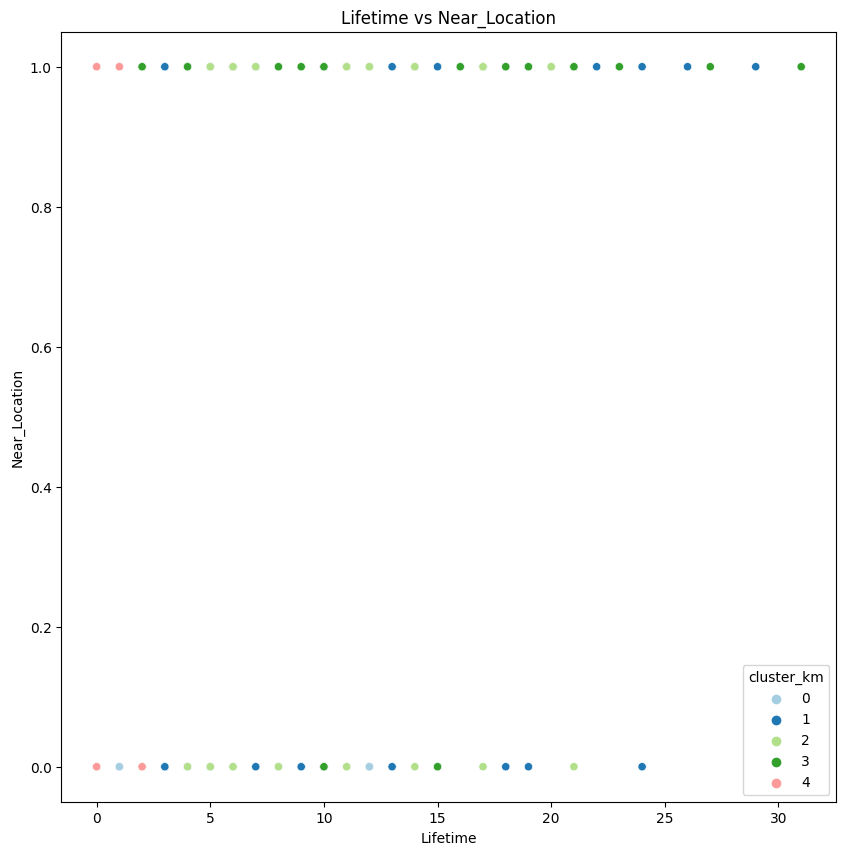

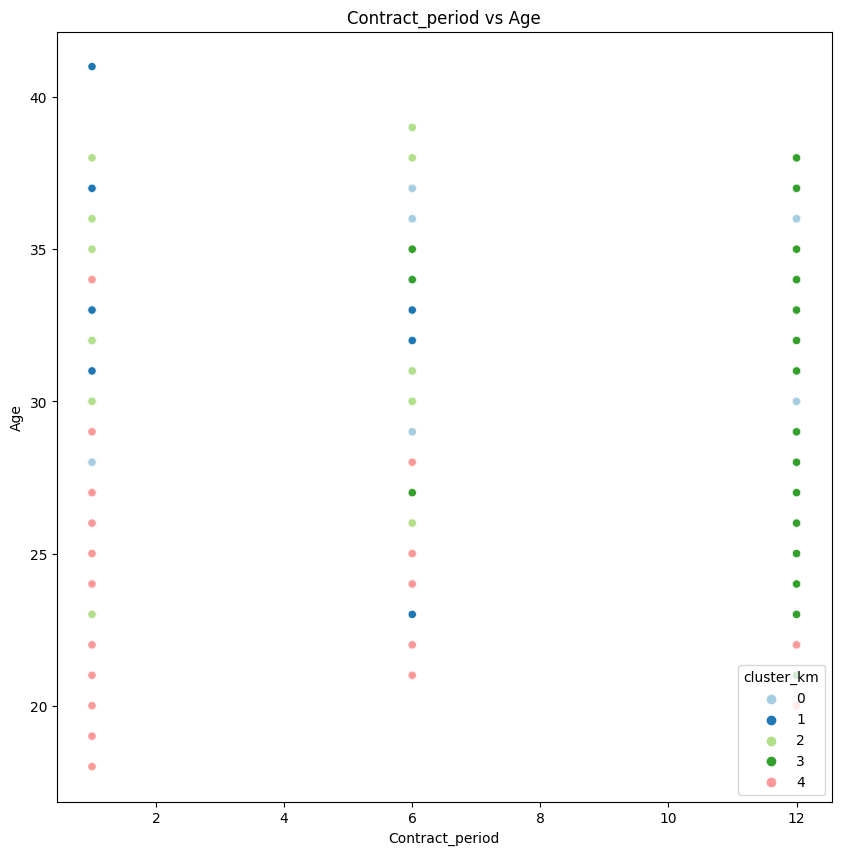

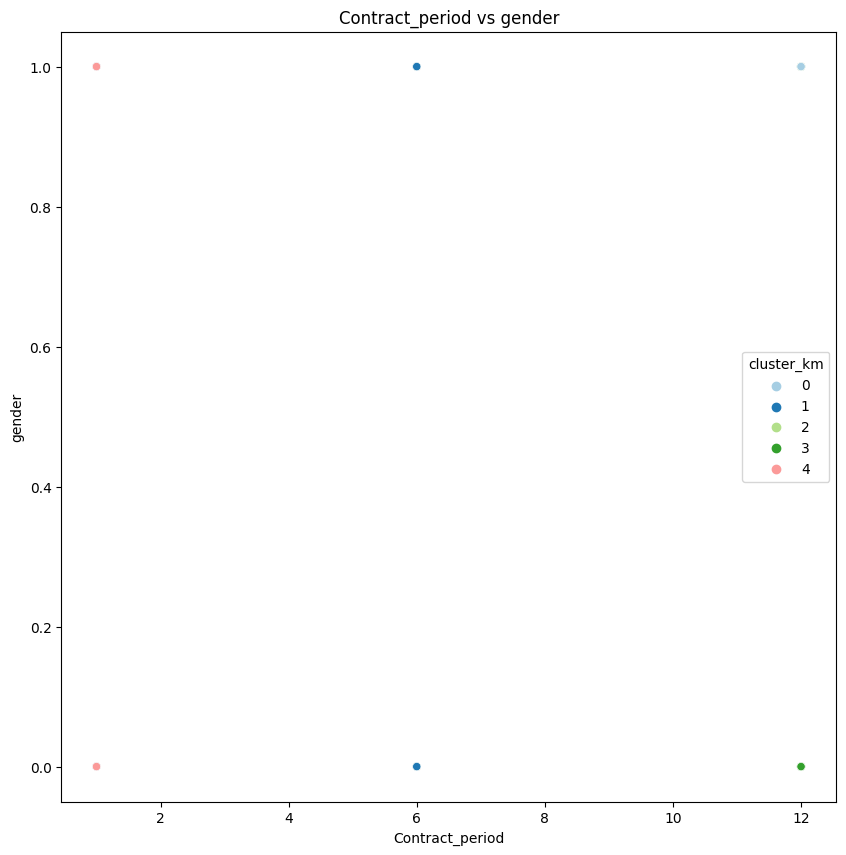

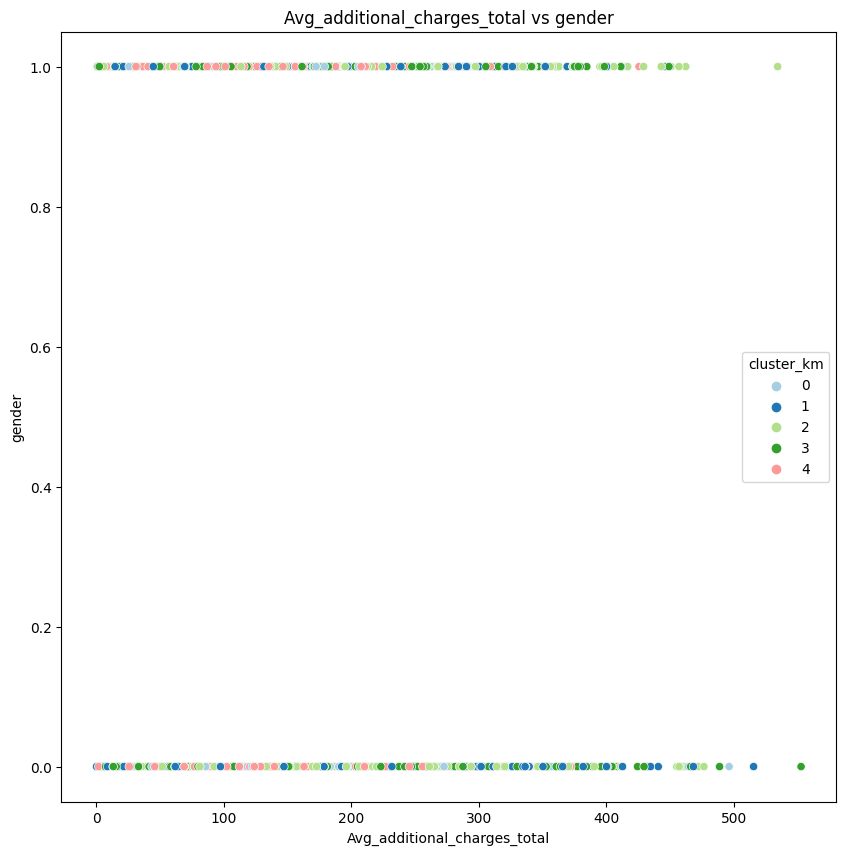

In [37]:
#Traza distribuciones de características para los clústeres. 

# define la función para representar gráficos de características pareadas para los clústeres
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
# representa el gráfico para las características pareadas de "clases a la semana" y "cargos adicinales"
show_clusters_on_plot(data, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'cluster_km') 

# representa el gráfico para las características pareadas de "frecuencia de clases" y "clases promeido al mes"
show_clusters_on_plot(data, 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'cluster_km')


# representa el gráfico para las características pareadas de "meses para que acabe el contrato" y "socios dados de baja"
show_clusters_on_plot(data, 'Month_to_end_contract', 'Churn', 'cluster_km') 


# representa el gráfico para las características pareadas de "Tiempo desde que llego el socio" y "cercanía al gimnasio"
show_clusters_on_plot(data, 'Lifetime', 'Near_Location', 'cluster_km') 

# representa el gráfico para las características pareadas de "Tiempo de contrato" y "edad"
show_clusters_on_plot(data, 'Contract_period', 'Age', 'cluster_km') 

# representa el gráfico para las características pareadas de "Tiempo de contrato" y "género"
show_clusters_on_plot(data, 'Contract_period', 'gender', 'cluster_km') 

# representa el gráfico para las características pareadas de "Cargos adicionales" y "género"
show_clusters_on_plot(data, 'Avg_additional_charges_total', 'gender', 'cluster_km') 


**¿Notas algo?**

Al comparar la frecuecia de acudir a clases y los gastos extras que hicieron los usuarios, no existe alguna diferencia significativa, que nos haga enfocarnos en algún grupo especifico.
Pero si observamos el siguiente gráfico al comparar la frcuencia mensual y semanal podemos observar que el grupo 3 tiene mayor dispersion al promedio de los otros grupos, lo que nos hace preguntarnos si este grupo esta presentando alguna actividad que debemos analizar u observar.

In [38]:
data=data.reset_index()
data

,index,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,3
3996,3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,4
3997,3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,3
3998,3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,1


In [39]:
#Calcula la tasa de cancelación para cada clúster 
tasa_cancelacion= data.groupby(["cluster_km"])['Churn'].sum()
tasa_cancelacion

cluster_km
0    100
1      1
2      6
3     15
4    939
Name: Churn, dtype: int64

**¿Qué grupos son propensos a irse y cuáles son leales?**

Tal como lo hemos visto desde los datos y gráficas anteriores el grupo 3 es el que más tasa de cancelación presenta el gimnasio.
Por mucho menos pero en segundo lugar tenemos al grupo 4.

Y los más leales son los usuarios del grupo 0


# Conclusiones y recomendaciones

Como hemos observado durante todo el proyecto, la pérdida de clientes es normal pero si podemos encontrar patrones en el comportamiento de los clientes que nos hagan sospechazar que está a punto de cancelar su suscirpción con nuestro gimansio.

El data proporcionado es completo, pero podemos seleccionar mejor las caracteiristicas a analiar que nos ayuden a mejorar con la presición de nuestro modelo. Es importante encontrar las caracteristicas más importantes que nos den maor información de los usuarios (caracteristicas coom el teléfono, o genero podrían ser omitidos, pero todo depnderá del estudio que este llevando a cabo).

En general el grupo 3 estuvo presentando, anmalias visibles en las tablas que nos indicaban que en ese grupo podian estar los clientes potenciales a cancelar, teniendo variaciones muy grandes en su constancia en ir al gimnasio o que son el grupo con menor numero de clientes con cercania a su trabajo o clase a las instalaciones, no llegaron por ninguna promocion pero a demás son los que tienen contratos de meses más pequeños, lo que nos puede indicar que son clientes que van en usca de gimnasios o cambian seguido de ellos por algún motivo personal.
Este grupo nos da varios factores que nos indican que serán los socios menos leales a nuestro gimnasio.

Podria buscar promociones o algún engament especial para este grupo  así poder conserva maor tiempo a estos usuarios.

Ambos métodos utilizados para su análisis dieron resultados mu similares, lo que nos da un buen ranfo de confiabilidad de los resultados.
